In [1]:
import tensorflow as tf
import os, glob
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
print(cv2.__version__)

4.5.2


In [3]:
path = '/home/kyj1103/darknet/'

### yolo로드(1)

In [4]:
#net = cv2.dnn.readNet(path+'backup/yolov4_final.weights','yolov4.cfg')
net = cv2.dnn.readNet('yolov4.weights','yolov4.cfg')
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [5]:
# 이미지 가져오기
img = cv2.imread(path+'data/dd20fad62dbf661c.jpg')
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

In [6]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [7]:
# 정보를 화면에 표시
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # 좌표
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [8]:
## 노이즈제거
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

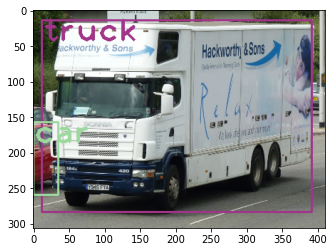

In [9]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
#plt.imshow("Image", img)
#plt.show()

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### yolo로드(2)

In [10]:
net = cv2.dnn_DetectionModel('yolov4.weights', 'yolov4.cfg')
net.setInputSize(704,704)
net.setInputScale(1.0 / 255)
net.setInputSwapRB(True)

frame = cv2.imread(path+'data/dd20fad62dbf661c.jpg')

In [11]:
with open("coco.names", "rt") as f:
    names = f.read().rstrip('\n').split('\n')
classes, confidences,boxes = net.detect(frame,confThreshold=0.1, nmsThreshold=0.4)

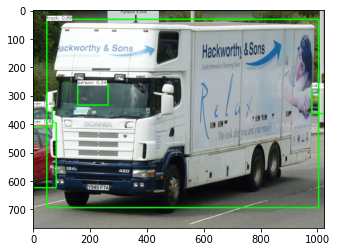

In [12]:
if len(classes) > 0:
    for classId,confidence,box in zip(classes.flatten(), confidences.flatten(), boxes):
        label = '%.2f' % confidence
        label = '%s: %s' % (names[classId], label)
        labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5,1)
        left, top, width, height = box
        top = max(top,labelSize[1])
        cv2.rectangle(frame,box,color=(0,255,0),thickness=3)
        cv2.rectangle(frame, (left,top - labelSize[1]), (left+labelSize[0], top+baseLine), (255,255,255), cv2.FILLED)
        cv2.putText(frame,label, (left,top), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0))
    
    
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))    
plt.show()   

### name_list

In [13]:
text_test = pd.read_csv('coco.names',header=None)

In [14]:
text_test=list(np.array(text_test[0].tolist()))

In [15]:
text_test[0]

'person'

### json파일 읽어오기

In [16]:
import json


with open(path+'20200701_133535_CIT-SDB-3012_01.json', 'r') as f:

    json_data = json.load(f)

print(json.dumps(json_data) )

{"FileInfo": {"Name": "20200701_133535_CIT-SDB-3012_01.mp4", "Extension": "mp4", "Created": "UTC 2021-01-01 07:57:41.", "CreatedLocal": "UTC 2021-01-01 19:57:41.", "FileSize": "2395263", "FrameCount": "280"}, "properties": {"Day/Night": "Day", "Weather": "Sun", "Event Type": "Jay Walk", "Camera Type": "Fixed"}, "AnnotationInfo": {"class": ["traffic sign", "person", "car"], "type": ["bbox"]}, "Annotation": {"frameNo": "279", "width": "1920", "height": "1080", "labels": [{"class": "traffic sign", "type": "bbox", "boxcorners": ["228.0", "2.0", "266.0", "100.0"], "id": "0"}, {"class": "traffic sign", "type": "bbox", "boxcorners": ["228.0", "2.0", "266.0", "100.0"], "id": "1"}, {"class": "car", "type": "bbox", "boxcorners": ["602.0", "148.0", "832.0", "366.0"], "id": "2"}, {"class": "car", "type": "bbox", "boxcorners": ["614.0", "348.0", "1280.0", "566.0"], "id": "3"}, {"class": "traffic sign", "type": "bbox", "boxcorners": ["228.0", "2.0", "266.0", "100.0"], "id": "4"}, {"class": "person",

In [17]:
print(json.dumps(json_data, indent="\t") )

{
	"FileInfo": {
		"Name": "20200701_133535_CIT-SDB-3012_01.mp4",
		"Extension": "mp4",
		"Created": "UTC 2021-01-01 07:57:41.",
		"CreatedLocal": "UTC 2021-01-01 19:57:41.",
		"FileSize": "2395263",
		"FrameCount": "280"
	},
	"properties": {
		"Day/Night": "Day",
		"Weather": "Sun",
		"Event Type": "Jay Walk",
		"Camera Type": "Fixed"
	},
	"AnnotationInfo": {
		"class": [
			"traffic sign",
			"person",
			"car"
		],
		"type": [
			"bbox"
		]
	},
	"Annotation": {
		"frameNo": "279",
		"width": "1920",
		"height": "1080",
		"labels": [
			{
				"class": "traffic sign",
				"type": "bbox",
				"boxcorners": [
					"228.0",
					"2.0",
					"266.0",
					"100.0"
				],
				"id": "0"
			},
			{
				"class": "traffic sign",
				"type": "bbox",
				"boxcorners": [
					"228.0",
					"2.0",
					"266.0",
					"100.0"
				],
				"id": "1"
			},
			{
				"class": "car",
				"type": "bbox",
				"boxcorners": [
					"602.0",
					"148.0",
					"832.0",
					"366.0"
				],
				"id": "2"
			},
			

In [18]:
json_data['Annotation']['labels']

[{'class': 'traffic sign',
  'type': 'bbox',
  'boxcorners': ['228.0', '2.0', '266.0', '100.0'],
  'id': '0'},
 {'class': 'traffic sign',
  'type': 'bbox',
  'boxcorners': ['228.0', '2.0', '266.0', '100.0'],
  'id': '1'},
 {'class': 'car',
  'type': 'bbox',
  'boxcorners': ['602.0', '148.0', '832.0', '366.0'],
  'id': '2'},
 {'class': 'car',
  'type': 'bbox',
  'boxcorners': ['614.0', '348.0', '1280.0', '566.0'],
  'id': '3'},
 {'class': 'traffic sign',
  'type': 'bbox',
  'boxcorners': ['228.0', '2.0', '266.0', '100.0'],
  'id': '4'},
 {'class': 'person',
  'type': 'bbox',
  'boxcorners': ['1650.0', '216.0', '1722.0', '438.0'],
  'id': '5'},
 {'class': 'person',
  'type': 'bbox',
  'boxcorners': ['1650.0', '216.0', '1722.0', '438.0'],
  'id': '6'},
 {'class': 'car',
  'type': 'bbox',
  'boxcorners': ['0.0', '446.0', '318.0', '698.0'],
  'id': '7'},
 {'class': 'car',
  'type': 'bbox',
  'boxcorners': ['602.0', '148.0', '832.0', '366.0'],
  'id': '8'},
 {'class': 'car',
  'type': 'bbox'

### 원본이미지 정보


In [19]:
from PIL import Image
 
image = Image.open(path+'data/dd20fad62dbf661c.jpg')
print(image.filename)
print(image.format)
print(image.mode)
print(image.size)

/home/kyj1103/darknet/data/dd20fad62dbf661c.jpg
JPEG
RGB
(1024, 765)


In [20]:
name=image.filename.split('/')[5]

In [21]:
image.size[0]

1024

### 이미지 생성시간

In [22]:
import os
import datetime

In [23]:
create_time = os.path.getctime(path+'data/dd20fad62dbf661c.jpg')

In [24]:
create_timestamp = datetime.datetime.fromtimestamp(create_time)
create_timestamp = create_timestamp.replace(microsecond=0)
print(type(create_timestamp), create_timestamp)

<class 'datetime.datetime'> 2021-06-28 16:56:39


### 이미지 크기

In [25]:
import os
mysize = os.path.getsize(path+'data/dd20fad62dbf661c.jpg')
print("mysize :", mysize)

mysize : 393627


### 객체검출한 정보

In [26]:
boxes

array([[156, 259, 108,  75],
       [  0, 396,  82, 228],
       [978, 269,  46,  95],
       [  0, 333,  68,  80],
       [ 48,  32, 954, 662]], dtype=int32)

#### boxes float-> str로 변환

In [27]:
total_boxes =[]
for i in range(len(boxes)):
    list_int=list(map(float,boxes[i].tolist()))
    list_int=list(map(str,list_int))
    total_boxes.append(list_int)              

In [28]:
classes

array([[0],
       [2],
       [2],
       [2],
       [7]], dtype=int32)

### json으로 만들기

In [29]:
import json
from collections import OrderedDict

In [30]:
file_data = OrderedDict()

In [54]:
file_data['FileInfo'] = {'Name':name,'Extension':image.format,'Created':'UTC '+str(create_timestamp)+'.','FileSize':str(mysize)}
file_data['AnnotationInfo']={'class':['person','car','truck'],'type':'bbox'}
file_data['Annotation'] = {'frameNo':str(0),'width':str(image.size[0]),'height':str(image.size[1]),'labels':[]}

In [55]:
## (1)방법

objs = file_data["Annotation"]["labels"]
for i in range(len(boxes)):
    objs.append({'class':text_test[int(classes[i])],'type':'bbox','boxcorners':total_boxes[i],'id':str(i)})

In [57]:
## (2)방법
for i in range(len(boxes)):
    file_data['Annotation']['Label'+' '+str(i+1)] = {'class':text_test[int(classes[i])],'type':'bbox','boxcorners':total_boxes[i],'id':i}

In [55]:
## (3)방법  (total_boxes가 아닌, boxes 이용시)
for i in range(len(boxes)):
    file_data['Annotation']['Label'+' '+str(i+1)] = {'class':text_test[int(classes[i])],'type':'bbox','boxcorners':boxes[i].tolist(),'id':i}

In [52]:
print(json.dumps(file_data, indent="\t") )

{
	"FileInfo": {
		"Name": "dd20fad62dbf661c.jpg",
		"Extension": "JPEG",
		"Created": "UTC 2021-06-28 16:56:39.",
		"FileSize": 393627
	},
	"AnnotationInfo": {
		"class": [
			"person",
			"car",
			"truck"
		],
		"type": "bbox"
	},
	"Annotation": {
		"frameNo": 0,
		"width": 1024,
		"height": 765,
		"labels": [
			{
				"class": "person",
				"type": "bbox",
				"boxcorners": [
					"156.0",
					"259.0",
					"108.0",
					"75.0"
				],
				"id": "0"
			},
			{
				"class": "car",
				"type": "bbox",
				"boxcorners": [
					"0.0",
					"396.0",
					"82.0",
					"228.0"
				],
				"id": "1"
			},
			{
				"class": "car",
				"type": "bbox",
				"boxcorners": [
					"978.0",
					"269.0",
					"46.0",
					"95.0"
				],
				"id": "2"
			},
			{
				"class": "car",
				"type": "bbox",
				"boxcorners": [
					"0.0",
					"333.0",
					"68.0",
					"80.0"
				],
				"id": "3"
			},
			{
				"class": "truck",
				"type": "bbox",
				"boxcorners": [
					"48.0",
					"32.0",
					"954.0

In [56]:
with open('result1111.json','w',encoding='utf-8') as make_file:
    json.dump(file_data, make_file,ensure_ascii=False,indent='\t')

In [47]:
del file_data['Annotation']

In [48]:
file_data['Annotation']

KeyError: 'Annotation'